In [2]:
# regression or classification models - f(data, labels) = pattern
# recurrent neural network - input values get passed to neuron which generates an output and a feed forward value for the next function call
# like a recursive call
# for nlp text generating, we dont just want to predict based on the most adjacent words but words at the beginning can have larger impact as well
# Example : I live in Ireland, that's why in school they teach us __Gaelic__ - LSTM
# go beyond the very short term memomry of RNN

In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

2024-02-22 18:00:28.678370: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 18:00:30.964700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 18:00:30.964797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 18:00:31.335751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 18:00:32.070576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 18:00:32.071867: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-02-22 18:02:12--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.24.59, 2404:6800:4006:804::201b
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.24.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2024-02-22 18:02:13 (488 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [6]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

In [9]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
# we will use the whole dataset to train so no OOV required
# adding 1 extra word for padding value
total_words = len(tokenizer.word_index) + 1
print(total_words)

2690


In [32]:
# input_sequences = []
# for line in corpus:
#     token_list = tokenizer.texts_to_sequences([line])[0]
#     print(token_list)
#     break;

In [33]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # beacuse texts_to_sequence returns [[]]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [37]:
input_sequences[0:7]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11]]

In [38]:
# padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [40]:
X = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [41]:
y = tf.keras.utils.to_categorical(labels, num_classes=total_words) # one hot encoding

In [44]:
print(tokenizer.word_index['in'])

8


In [47]:
# model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #input_length 1 less because final value is y
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 300)               301200    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1379890 (5.26 MB)
Trainable params: 1379890 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50


2024-02-22 18:44:18.747358: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 129528880 exceeds 10% of free system memory.


377/377 [==============================] - 15s 33ms/step - loss: 6.7441 - accuracy: 0.0638
Epoch 2/50
377/377 [==============================] - 12s 33ms/step - loss: 6.2252 - accuracy: 0.0766
Epoch 3/50
377/377 [==============================] - 12s 33ms/step - loss: 5.9524 - accuracy: 0.0850
Epoch 4/50
377/377 [==============================] - 13s 33ms/step - loss: 5.6571 - accuracy: 0.0958
Epoch 5/50
377/377 [==============================] - 13s 33ms/step - loss: 5.3182 - accuracy: 0.1146
Epoch 6/50
377/377 [==============================] - 13s 33ms/step - loss: 4.9388 - accuracy: 0.1340
Epoch 7/50
377/377 [==============================] - 12s 33ms/step - loss: 4.5594 - accuracy: 0.1593
Epoch 8/50
377/377 [==============================] - 12s 33ms/step - loss: 4.2006 - accuracy: 0.1833
Epoch 9/50
377/377 [==============================] - 13s 33ms/step - loss: 3.8443 - accuracy: 0.2250
Epoch 10/50
377/377 [==============================] - 12s 33ms/step - loss: 3.5098 - accurac

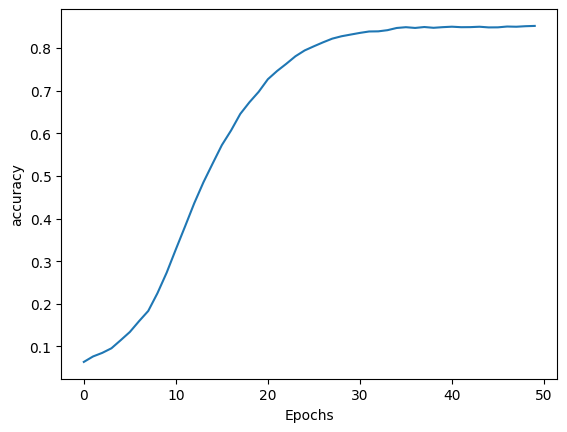

In [49]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [50]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 14ms/step
I've got a bad feeling about this water o sit and sport and play the sod ones turning grey tell to the fray all theres no new way and you father oflynn well she as fair of all by the name of day went i courted her in killarney when he died of my passage the sea may be rough down to the sea are treads the thorn of killarney no more more are he say you mind it was my love forever enough to her gear they died of my arms boy to your fair eyes are fair are your covers buttoned down down the sea
